In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
data = pd.read_excel('Online Retail.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [6]:
data['total_sale'] = data['Quantity'] * data['UnitPrice']

In [7]:
data['date'] = data['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, x.day))

In [8]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sale,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09


In [9]:
pindate = max(data['date'] + dt.timedelta(1))

In [10]:
pindate

Timestamp('2011-12-10 00:00:00')

## Now We Want To Create RFM:
### R : Last shopping
### F : How Many Time In Last Year Did Shopping
### M: Sum Or Mean All Patment

In [22]:
rfm = data.groupby('CustomerID').agg({
    'date': lambda x :(pindate - x.max()).days,
    'InvoiceNo' : 'count',
    'total_sale' : 'sum'
    
})

In [23]:
rfm

,date,InvoiceNo,total_sale
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [24]:
date_label = range(4, 0, -1)
r = pd.qcut(rfm['date'], q = 4, labels = date_label)

In [43]:
count_label = range(1, 5)
f = pd.qcut(rfm['InvoiceNo'], q = 4, labels = count_label)

In [44]:
sum_label = range(1, 5)
m = pd.qcut(rfm['total_sale'], q = 4, labels = sum_label)

In [45]:
rfm['last_shop_day'] = r
rfm['how_manyTime_shopping'] = f
rfm['sum_all_payment'] = m

In [46]:
rfm

,date,InvoiceNo,total_sale,last_shop_day,how_manyTime_shopping,sum_all_payment
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,3,182,4310.00,4,4,4
12348.0,76,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,311,17,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,13,176.60,4,1,1


In [41]:
data.describe()

,Quantity,UnitPrice,CustomerID,total_sale
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [47]:
rfm[rfm['total_sale'] > 168469]

,date,InvoiceNo,total_sale,last_shop_day,how_manyTime_shopping,sum_all_payment
CustomerID,,,,,,
14646.0,2,2085,279489.02,4,4,4
17450.0,9,351,187482.17,4,4,4
18102.0,1,433,256438.49,4,4,4


In [48]:
x = rfm.iloc[:, 3:]

In [53]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 6, init='k-means++', max_iter=400)
km.fit(x)

KMeans(max_iter=400, n_clusters=6)

In [54]:
km.labels_

array([0, 5, 2, ..., 4, 5, 5])

In [55]:
rfm['Rank'] = km.labels_

In [57]:
rfm['Rank'].value_counts()

5    992
0    831
3    807
1    629
4    602
2    511
Name: Rank, dtype: int64

In [58]:
rfm

,date,InvoiceNo,total_sale,last_shop_day,how_manyTime_shopping,sum_all_payment,Rank
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,0
12347.0,3,182,4310.00,4,4,4,5
12348.0,76,31,1797.24,2,2,4,2
12349.0,19,73,1757.55,3,3,4,5
12350.0,311,17,334.40,1,1,2,0
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,0
18281.0,181,7,80.82,1,1,1,0
18282.0,8,13,176.60,4,1,1,4


In [59]:
km.inertia_

3147.2467490145564

In [72]:
param = []
for cluster in range(1, 10):
    print(cluster)
    km = KMeans(n_clusters = cluster, init='k-means++', max_iter=400)
    km.fit(x)
    param.append(km.inertia_)
    

1
2
3
4
5
6
7
8
9


In [68]:
import seaborn as sns

<AxesSubplot:>

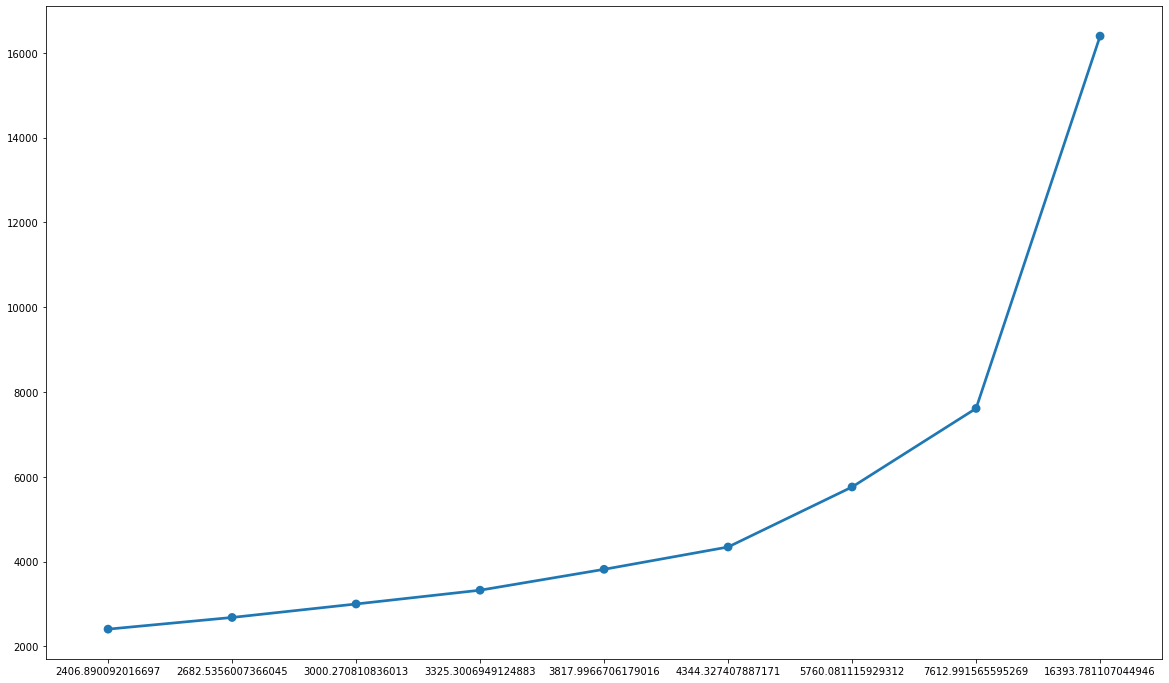

In [71]:
# For Choose Best K Param
plt.figure(figsize=(20, 12))
sns.pointplot(x = param, y = param)

## Let's Create Dbscan:
### Dbscan Are Depend 2 Variable esp, min_samples
### Like K-means We Need To Khonw How Model Is Good In Last Alghorithm We Have Inertina_ In Dbscan Has Silhouette 

In [73]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [74]:
db = DBSCAN(eps = 0.7, min_samples = 4)
db.fit(x)

DBSCAN(eps=0.7, min_samples=4)

In [77]:
print(silhouette_score(x, db.labels_))
print('silhoette is betwwen 1, -1 if score near by 0 its mean clusters are cover each other')

0.998139023302419
silhoette is betwwen 1, -1 if score near by 0 its mean clusters are cover each other
